In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ANALYTICAL PART -PROOF OF CONCEPT

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def energies_current(t1,t2,t3,lambda1,phi1,phi3):#(t1,t2,t3,t3prime,lambda1,phi1,phi3):
    energies = []
    phi2_values = np.linspace(0, 2*np.pi, 100)
    Delta = 0.2*1e-3
    current= []
    
    r1 = np.sqrt(1-t1**2)
    r2 = np.sqrt(1-t2**2)
    r3 = np.sqrt(1-t3**2)
    
    a = -2*t1*t2*(r3 +1)

    b = -2*t1*t3*(r2 +1)

    c = -2*t2*t3*(r1 +1)

#     d = lambda1*(r1*r2*r3 + r1*r2+ r1*r3 + r2*r3 + r1 + r2+ r3 +1) \
#         + 1j*(3*r1*r2*r3 + r1*r2 + r1*r3 + r2*r3 -r1 -r2 -r3 -3)
    
    d = 3*r1*r2*r3 + r1*r2 + r1*r3 + r2*r3 -r1 -r2 -r3 -3


    S12 = a/d
    S13 = b/d
    S23 = c/d

    print(S12, S13, S23)
    
    for phi2 in phi2_values:
        
        energy = Delta*np.sqrt(1- S12**2*np.sin((phi1 - phi2)/2)**2 - S13**2*np.sin((phi1 - phi3)/2)**2 \
                               - S23**2*np.sin((phi2 - phi3)/2)**2)
        
        factor_energy = np.sqrt(1- S12**2*np.sin((phi1 - phi2)/2)**2 - S13**2*np.sin((phi1 - phi3)/2)**2 \
                               - S23**2*np.sin((phi2 - phi3)/2)**2)
    
        energies.append(energy)
        factor = (Delta/(2*factor_energy))
        I =  factor*(S12**2*np.sin(phi2 - phi1) + S23**2* np.sin(phi2 - phi3))
        current.append(I)
    
    return np.array(energies)*1e3,np.array(current)/Delta 


In [4]:
y_t31  = energies_current(t1 =1.0,t2=1.0,t3=0.4,lambda1 =0,phi1=0,phi3=1.5*np.pi)
y_t32  = energies_current(t1 =0.6,t2=0.6,t3=0.8,lambda1 =0,phi1=0,phi3=1.5*np.pi)

I_31 = y_t31[1]
I_32 = y_t32[1]
Itotal = (I_31 +I_32)
maximum = max(Itotal)
minimum = min(Itotal)
print(maximum, minimum)
n = (maximum - abs(minimum))/(maximum + abs(minimum))
print(n*100)

0.9786838916623373 0.20426322166753258 0.20426322166753258
0.47058823529411753 0.7058823529411763 0.7058823529411763
1.0206476358592411 -1.4487315314174687
-17.33568911696654


# Figure 2 

/tmp/ipykernel_29282/4042920807.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 1, facecolor="lightcyan")
/tmp/ipykernel_29282/4042920807.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 1, facecolor="white")
/tmp/ipykernel_29282/4042920807.py:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 2, facecolor="white")


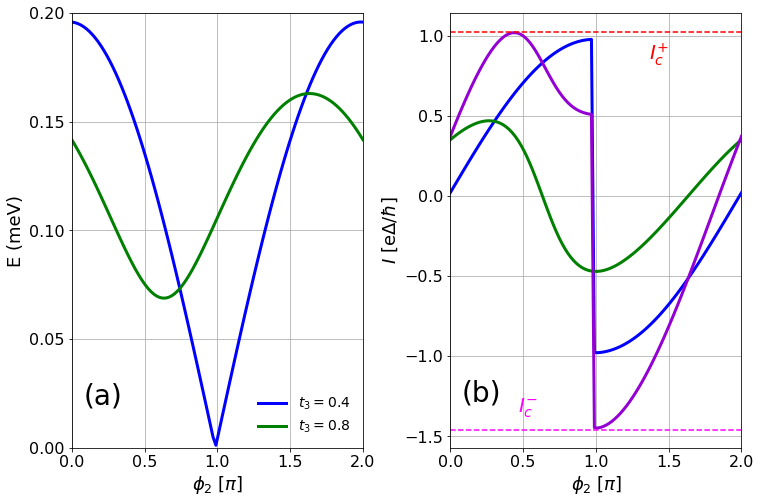

In [5]:
figure_width = 10  # Adjust this to your desired width
figure_height = 12  # Adjust this to your desired height
phi2_values = np.linspace(0, 2*np.pi, 100)
rows, cols = 1, 2
f, axs = plt.subplots( rows, cols,figsize=(12,8))
plt.subplot( rows, cols, 1, facecolor="lightcyan")
plt.subplots_adjust(wspace=0.3, hspace=0.1)
#f.tight_layout()

#plt.subplot(1, 2, 1)
plt.subplot( rows, cols, 1, facecolor="white")

frame1 = plt.gca()

plt.plot(phi2_values/np.pi, y_t31[0], lw=3, color = 'blue',label ='$t_{3} = 0.4$' )
plt.plot(phi2_values/np.pi, y_t32[0], lw=3, color= 'green',label ='$t_{3} = 0.8$')

plt.legend(frameon=False,fontsize=14,loc=4)

plt.xlabel("$\phi_2\;[\pi]$",fontsize=18)
plt.ylabel("E (meV)",fontsize=18)
plt.xticks(np.arange(min(phi2_values/np.pi), max(phi2_values/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(np.arange(0.0, max(np.real(y_t31[0]))+0.05,0.05), fontsize = 16)
#plt.yticks(fontsize=16)
#plt.xticks(np.arange(min(phi2_values/np.pi), max(phi2_values/np.pi)+0.5, 0.5), fontsize = 16)
plt.xlim(0,2)
plt.ylim(0,0.2)
plt.text(0.08, 0.02, "(a)", fontsize=28)

plt.grid()


# plt.subplot(1, 2, 2)
plt.subplot( rows, cols, 2, facecolor="white")

frame1 = plt.gca()
plt.plot(phi2_values/np.pi, I_31, lw=3, color='blue')
plt.plot(phi2_values/np.pi, I_32, lw=3, color='green')
plt.plot(phi2_values/np.pi, Itotal, lw=3, color='darkviolet')
plt.xlabel("$\phi_2\;[\pi]$",fontsize=18)
plt.ylabel("$\mathit{I}$ [e$\Delta$/$\hbar$]", fontsize=18)
#plt.xticks(np.arange(min(phi2_values/np.pi), max(phi2_values/np.pi)+0.5, 0.5), fontsize = 14)
plt.yticks(fontsize=16)
plt.axhline(y=1.025, color='r', linestyle='--', label='Horizontal Line at y=10')
plt.axhline(y=-1.46, color='magenta', linestyle='--', label='Horizontal Line at y=10')
# plt.axvline(x=0.5, color='r', linestyle='--', label='Horizontal Line at y=10')
# plt.axvline(x=-0.5, color='magenta', linestyle='--', label='Horizontal Line at y=10')
# plt.axhline(y= -0.16, color='black', linestyle='--', label='Horizontal Line at y=10')
# plt.axhline(y= 0.28, color='blue', linestyle='--', label='Horizontal Line at y=10')
plt.xticks(np.arange(min(phi2_values/np.pi), max(phi2_values/np.pi)+0.5, 0.5), fontsize = 16)
#plt.yticks(fontsize=16)
plt.text(1.5, 0.8, '$I^{+}_c$', color='r', fontsize=20, ha='right', va='bottom')
plt.text(0.6, -1.25, '$I^{-}_c$', color='magenta', fontsize=20, ha='right', va='top')
plt.xlim(0,2)
plt.text(0.08, -1.28, "(b)", fontsize=28)

plt.grid()
plt.savefig("energies_current_phi3_different_t3coupling.pdf",bbox_inches ="tight")

plt.show()

# COLORMAP 

In [6]:
def energies_current_map(t1,t2,t3,lambda1,phi1,phi2,phi3):
    energies = []
    #phi2_values = np.linspace(0, 2*np.pi, 100)
    Delta = 0.2*1e-3
    current= []
    
    r1 = np.sqrt(1-t1**2)
    r2 = np.sqrt(1-t2**2)
    r3 = np.sqrt(1-t3**2)
    
    a = -2*t1*t2*(r3 +1)

    b = -2*t1*t3*(r2 +1)

    c = -2*t2*t3*(r1 +1)

#     d = lambda1*(r1*r2*r3 + r1*r2+ r1*r3 + r2*r3 + r1 + r2+ r3 +1) \
#         + 1j*(3*r1*r2*r3 + r1*r2 + r1*r3 + r2*r3 -r1 -r2 -r3 -3)
    
    d = 3*r1*r2*r3 + r1*r2 + r1*r3 + r2*r3 -r1 -r2 -r3 -3


    S12 = a/d
    S13 = b/d
    S23 = c/d
   
    factor_energy = np.sqrt(1- S12**2*np.sin((phi2 - phi1)/2)**2 - S13**2*np.sin((phi1 - phi3)/2)**2 - S23**2*np.sin((phi2 - phi3)/2)**2)
    energy = Delta*factor_energy
    
    
    factor = (Delta/(2*factor_energy))
    I =  factor*(S12**2*np.sin(phi2 - phi1) + S23**2* np.sin(phi2 - phi3))

    return I/Delta

In [7]:
%%time
phase2 = np.linspace(-2*np.pi, 2 * np.pi, 100)
phase3 = np.linspace(-2 * np.pi ,2 * np.pi, 100)

map_phases_single = np.zeros((len(phase2), len(phase3)))
map_phases_two_modes = np.zeros((len(phase2), len(phase3)))


for iphase2, phi2 in enumerate(phase3):
    for iphase3, phi3 in enumerate(phase2):
        map_phases_two_modes[iphase2, iphase3] = energies_current_map(t1=1.0, t2=1.0, t3=0.4,lambda1=0,phi1=0, phi2=phi2, phi3=phi3) + energies_current_map(t1=0.6, t2=0.6, t3=0.8,lambda1=0,phi1=0, phi2=phi2, phi3=phi3)

        map_phases_single[iphase2, iphase3] = energies_current_map(t1=0.6, t2=0.6, t3=0.8,lambda1=0, phi1=0, phi2=phi2, phi3=phi3)
        

CPU times: user 600 ms, sys: 2.25 ms, total: 602 ms
Wall time: 601 ms


# FIGURE 3

/tmp/ipykernel_29282/4143847502.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticks().astype(int), fontsize=14)  # Increase x-axis fontsize
/tmp/ipykernel_29282/4143847502.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticks().astype(int), fontsize=14)  # Increase x-axis fontsize


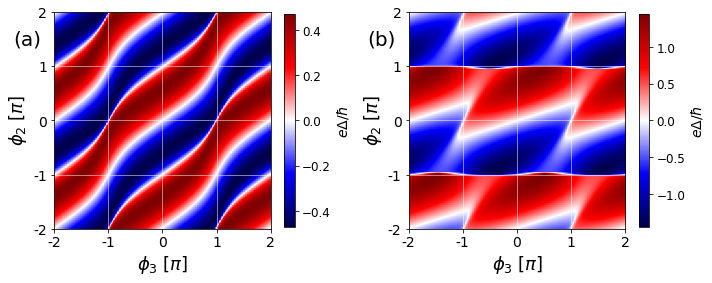

In [8]:
# Create a figure and axis with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Plot the first imshow
img1 = axes[0].imshow(map_phases_single, cmap='seismic', origin='lower', extent=[-2, 2, -2, 2])
axes[0].set_xlabel("$\phi_3\;[\pi]$", fontsize=18)
axes[0].set_ylabel("$\phi_2\;[\pi]$", fontsize=18)
axes[0].grid(True, color='white', linestyle='-', linewidth=0.5)
cbar1 = plt.colorbar(img1, shrink=0.305)
cbar1.set_label("$e\Delta/\hbar$", fontsize=14)
cbar1.ax.tick_params(axis='y', labelsize=12)



# Set y-axis ticks in steps of 1 for the first subplot
axes[0].set_yticks(np.arange(-2, 2.1, 1))
axes[0].set_yticklabels(np.arange(-2, 2.1, 1).astype(int), fontsize=14)  # Increase fontsize
axes[0].set_xticklabels(axes[0].get_xticks().astype(int), fontsize=14)  # Increase x-axis fontsize
axes[0].text(-2.5, 1.5, "(a)", fontsize=20, va='center', ha='center')


# Plot the second imshow
img2 = axes[1].imshow(map_phases_two_modes, cmap='seismic', origin='lower', extent=[-2, 2, -2, 2])
axes[1].set_xlabel("$\phi_3\;[\pi]$", fontsize=18)
axes[1].set_ylabel("$\phi_2\;[\pi]$", fontsize=18)
axes[1].grid(True, color='white', linestyle='-', linewidth=0.5)


cbar2 = plt.colorbar(img2, shrink=0.305)
cbar2.set_label("$e\Delta/\hbar$", fontsize=14)
cbar2.ax.tick_params(axis='y', labelsize=12)



# Set y-axis ticks in steps of 1 for the second subplot
axes[1].set_yticks(np.arange(-2, 2.1, 1))
axes[1].set_yticklabels(np.arange(-2, 2.1, 1).astype(int), fontsize=14)  # Increase fontsize
axes[1].set_xticklabels(axes[1].get_xticks().astype(int), fontsize=14)  # Increase x-axis fontsize
axes[1].text(-2.5, 1.5, "(b)", fontsize=20, va='center', ha='center')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig("colormap_ondemode_twomodes.pdf", bbox_inches="tight")
plt.show()


In [9]:
def analytical_energies_supercurrent(t1,t2,t3,lambda1,phi1,phi3):
    energies = []
    phi2_values = np.linspace(0, 2*np.pi, 200)
    Delta = 0.2*1e-3

    r1 = np.sqrt(1-t1**2)
    r2 = np.sqrt(1-t2**2)
    r3 = np.sqrt(1-t3**2)
    
    a = -2*t1*t2*(r3 +1)

    b = -2*t1*t3*(r2 +1)

    c = -2*t2*t3*(r1 +1)

#     d = lambda1*(r1*r2*r3 + r1*r2+ r1*r3 + r2*r3 + r1 + r2+ r3 +1) \
#         + 1j*(3*r1*r2*r3 + r1*r2 + r1*r3 + r2*r3 -r1 -r2 -r3 -3)
    
    d = 3*r1*r2*r3 + r1*r2 + r1*r3 + r2*r3 -r1 -r2 -r3 -3


    S12 = a/d
    S13 = b/d
    S23 = c/d

    print(S12, S13, S23)
    
    for phi2 in phi2_values:
        
        energy = Delta*np.sqrt(1- S12**2*np.sin((phi1 - phi2)/2)**2 - S13**2*np.sin((phi1 - phi3)/2)**2 \
                               - S23**2*np.sin((phi2 - phi3)/2)**2)
    
        energies.append(energy)
        
    I = -1*np.gradient(energies, axis=0)
    
    return 2*I 

In [10]:
def teste(t1,t2,lambda1, phi1):
    phase3 = np.linspace(0, 2*np.pi, 200)
    values1=[]
    values2=[]
    values3=[]
    values4=[]
    values5=[]
    values6=[]
    values7=[]
    values8=[]
    values9=[]
    values10=[]
    maximum =[]
    minimum =[]
    efficiency =[]
    Delta = 0.2*1e-3

    for phi3 in phase3:
        
        transmission = np.linspace(0,1,50)
        t3t = list(transmission)
        #t2t = np.linspace(0,1,4) #np.linspace(0,1,40)
        values=[]
        
        for i in t3t:
            
            valores = analytical_energies_supercurrent(t1=t1,t2=t2,t3=i,lambda1=lambda1,phi1=phi1,phi3=phi3)
            values.append(valores)
       
        maxi = max(sum(values))/Delta
        mini = min(sum(values))/Delta

        
        maximum.append(maxi) 
        minimum.append(abs(mini))
    
        n = (maxi - abs(mini))/(abs(maxi) + abs(mini))
        efficiency.append(n)
        
    return np.array(maximum), np.array(minimum), efficiency, np.array(values)
    

# FIGURE 4

In [11]:
values = teste(t1=0.8,t2=0.8,lambda1=0.0,phi1=0.0)
maximum = values[0]
minimum = values[1]
efficiency = values[2]

1.0 0.0 0.0
0.9997917534338101 0.020406038300344993 0.020406038300344993
0.9991670135996575 0.04079932680815626 0.04079932680815626
0.9981257792756302 0.06116711569211111 0.06116711569211111
0.9966680456984306 0.08149665492646653 0.08149665492646653
0.9947938004394472 0.10177519389997175 0.10177519389997175
0.9925030175627552 0.12198998066710744 0.12198998066710744
0.9897956499941836 0.14212826071387022 0.14212826071387022
0.9866716200069069 0.16217727510260457 0.16217727510260457
0.9831308077024811 0.18212425785022776 0.18212425785022776
0.9791730373361189 0.2019564323812366 0.2019564323812366
0.9747980613001007 0.22166100688062348 0.22166100688062348
0.9700055415384584 0.24122516835164792 0.24122516835164792
0.9647950281177627 0.26063607515847864 0.26063607515847864
0.9591659346211675 0.2798808478030238 0.2798808478030238
0.9531175099633322 0.2989465576474487 0.2989465576474487
0.9466488061393847 0.31782021324724635 0.31782021324724635
0.9397586413177221 0.33648874390205374 0.3364887

/tmp/ipykernel_29282/2354058501.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


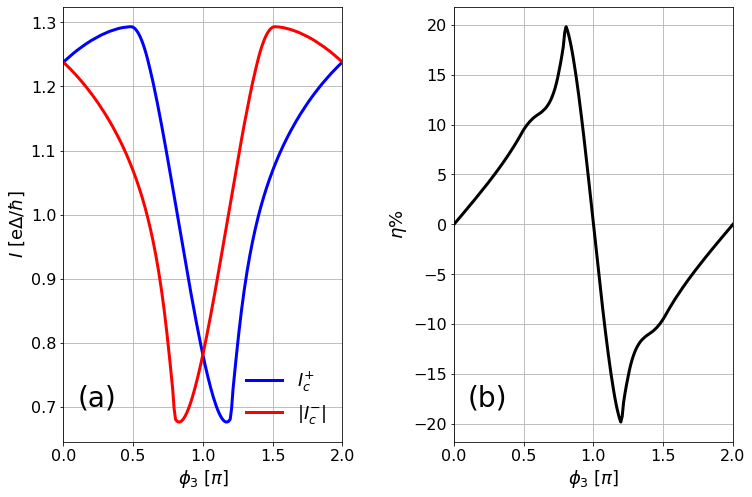

In [12]:
fig =plt.figure(1,figsize=(12,8))#cambio de tamaño del area de ploteo (x, y)
fig.subplots_adjust(hspace=0.15, wspace=0.4)

frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
#     frame1.axes.yaxis.set_ticklabels([])
phase3 = np.linspace(0, 2*np.pi, 200)
plt.subplot(1, 2, 1)
plt.plot(phase3/np.pi, np.array(maximum), label='$I^{+}_c$', lw = 3, color='blue')
plt.plot(phase3/np.pi, np.array(minimum), label='$|I^{-}_c|$', lw = 3, color= 'red')
plt.xlabel("$\phi_3\;[\pi]$", fontsize=18)    
plt.ylabel("$\mathit{I}$ [e$\Delta$/$\hbar$]", fontsize=18)
plt.xlim(0,2)
plt.xticks(np.arange(min(phase3/np.pi), max(phase3/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(fontsize = 16)
plt.text(0.1, 0.7, "(a)", fontsize=28)
plt.legend(frameon=False,loc='lower right',fontsize=18)

# inclination_angle = 0 
# plt.annotate("$I^{+}_c$", fontsize=18, xy=(0.7, 20.5), xytext=(1.1, 18),
#             arrowprops=dict(arrowstyle='->'))
# plt.annotate('$I^{-}_c$',fontsize=18, xy=(1.2, -18.6), xytext=(1.1, -15),
#             arrowprops=dict(arrowstyle='->'))
plt.grid()

#plot 2:
plt.subplot(1, 2, 2)
#plt.plot(phase3/np.pi,np.array(efficiency)*100,  '-ro', lw = 2.5, color='magenta')
plt.plot(phase3/np.pi,np.array(efficiency)*100, lw = 3, color='black')

plt.xlabel("$\phi_3\;[\pi]$", fontsize=18)
plt.ylabel("$\eta$%", fontsize=18)
plt.xlim(0,2)
plt.xticks(np.arange(min(phase3/np.pi), max(phase3/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(fontsize = 16)
plt.text(0.1, -18.2, "(b)", fontsize=28)

plt.grid()

plt.savefig("supercurrent_efficiency.pdf",bbox_inches ="tight")

plt.show();


# NUMERICAL CALCULATION

In [3]:
import ipyparallel as ipp

cluster = ipp.Client()

v = cluster[:]
lview = cluster.load_balanced_view()
len(v)

20

In [14]:
import os

os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1 
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1                              #Block multithreading
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1

In [2]:
#cwd = os.getcwd()   

In [16]:
%%px --local

import kwant
import tinyarray
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla
import scipy.linalg as la
import numpy as np
from numpy import linalg as LA
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [17]:
%%px --local

from cmath import exp
from math import pi
# Pauli matrices
import scipy.constants as sc
from scipy.constants import physical_constants
from scipy import constants
from types import SimpleNamespace
plt.rcParams.update({'font.size': 16})

# NUMERICAL PART

In [18]:
%%px --local

tau_0 = tinyarray.array([[1, 0], [0, 1]])
tau_x = tinyarray.array([[0, 1], [1, 0]])
tau_y = tinyarray.array([[0, -1j], [1j, 0]])
tau_z = tinyarray.array([[1, 0], [0, -1]])
taux1 = tinyarray.array([[0, 1], [0, 0]])
taux2 = tinyarray.array([[0, 0], [1, 0]])

In [19]:
%%px --local

m_e = physical_constants['electron mass'][0]
eV = physical_constants['electron volt'][0]
hbar = physical_constants['reduced Planck constant'][0]
e_hbar = physical_constants['elementary charge over h-bar'][0]

In [20]:
# We have created the same system but with a one function
def make_system(L_N,W):
    #CREATE SYSTEM
    #W=100
    a = 5*1e-9
    m = sc.m_e*0.014
    t = (sc.hbar**2/(2*m*a**2))/sc.eV
    
    lat = kwant.lattice.square(a*1e9, norbs=1)
    syst = kwant.Builder()
   
    
    def system(pos):                # This is the Normal part       
        (x,y) = pos
        ret = False
        if (0 <= x <= L_N and 0 <= y <= W):
            ret = True
        return ret
    
    
    B_field_temp = 0#1e-10
    
    def onsite(site, mu):
        (x, y) = site.pos
        return  (4 * t - mu) 
    
    def hop_x(site1, site2):
        return -t 
    
    def hop_y(site1,site2):
        return -t 
       
    syst[lat.shape(system, (0,0))] = onsite
    #syst[lat.neighbors()] = hop_system #-t * tau_z
    syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_x
    syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_y

    def lead_shape(pos):
        (x, y) = pos
        ret = False
        if 0 <= y <= W:
            ret=True
        return ret
    
    def lead_top_shape(pos):
        (x, y) = pos
        ret = False
        if 0 <= x <= L_N:
            ret=True
        return ret
   
    def left_onsite(site, mu):
        return (4 * t - mu)
    
    def right_onsite(site, mu):

        return  (4 * t - mu)
    
    def top_onsite(site, mu):
        return (4 * t - mu)
    
    
    def hop_lead_x(site1 ,site2):
        return -t
    
    def hop_lead_y(site1, site2):
        return -t 
   

    # Now we go to define the leads
    # Left lead - normal, so the order parameter is zero
    dx =a*1e9
   
    lead_left = kwant.Builder(kwant.TranslationalSymmetry((-dx, 0)), time_reversal= 1)
    lead_left[lat.shape(lead_shape, (0, 0))]  = left_onsite
    #lead_left[lat.neighbors()] = hop_lead
    lead_left[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_lead_x
    lead_left[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_lead_y
    

    lead_right = kwant.Builder(kwant.TranslationalSymmetry((dx, 0)), time_reversal= 1)
    lead_right[lat.shape(lead_shape, (0, 0))]  = right_onsite
    #lead_right[lat.neighbors()] = hop_lead
    lead_right[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_lead_x
    lead_right[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_lead_y
    
    
    lead_top = kwant.Builder(kwant.TranslationalSymmetry((0, dx)), time_reversal= 1)
    lead_top[lat.shape(lead_top_shape, (0, 0))]  = top_onsite
    #lead_top[lat.neighbors()] = hop_lead
    lead_top[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_lead_x
    lead_top[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_lead_y
     
    syst.attach_lead(lead_left)
    syst.attach_lead((lead_right))
    syst.attach_lead(lead_top)
 
    syst = syst.finalized()

        
    return syst

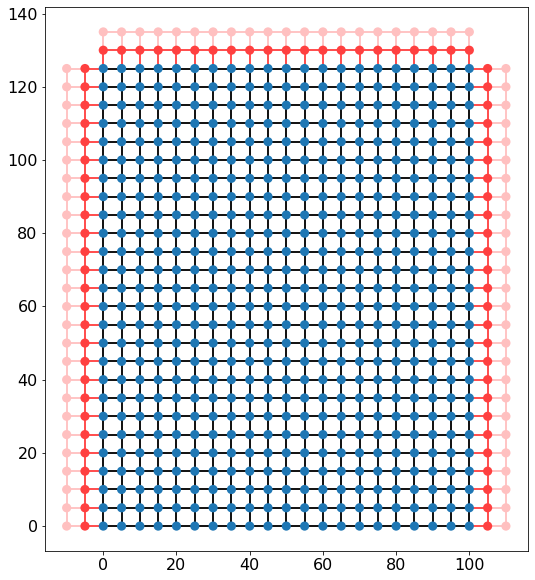

In [21]:
syst = make_system(L_N = 100, W=125)
kwant.plot(syst, fig_size=(10,10), show = False);
plt.savefig("kwant_teste.pdf", bbox_inches='tight')

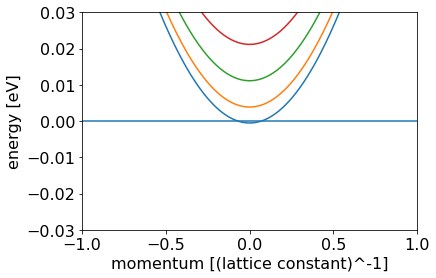

In [22]:
lead1 = syst.leads[1]
kwant.plotter.bands(lead1, momenta = 600, show=False, params=dict(mu = 2*1e-3))
plt.xlabel("momentum [(lattice constant)^-1]")
plt.ylabel("energy [eV]")
plt.xlim(-1,1)
plt.ylim(-0.03, 0.03)
plt.axhline(y=0)
plt.show()

In [23]:
def ABS(smatrix, Delta, phi1, phi2, phi3):
    s = smatrix
    N, M, L = [len(li.momenta) // 2 for li in s.lead_info]
    s = s.data
    
    #print("Shape of the scattering matrix:", np.shape(s))
    
    r_a11 = 1j * np.exp(-1j * phi1) * np.eye(N)
    r_a12 = np.zeros((N, M))
    r_a13 = np.zeros((N, L))

    r_a21 = r_a12.T
    r_a22 = 1j * np.exp(-1j * phi2) * np.eye(M)
    r_a23 = np.zeros((M,L))
    
    r_a31 = r_a13.T
    r_a32 = r_a23.T
    r_a33 = 1j * np.exp(-1j * phi3) * np.eye(L) 
    
    r_a = np.bmat([[r_a11, r_a12, r_a13], [r_a21, r_a22, r_a23],[r_a31, r_a32, r_a33]])
    zeros = np.zeros(shape=(len(s), len(s)))
    matrix = np.bmat([[zeros, (s.T.conj()).dot(r_a.conj())],
                      [(s.T).dot(r_a), zeros]])

    eigVl, eigVc  = la.eig(matrix)
    #eigVc = la.qr(eigVc)[0]
    eigVlinds = eigVl.argsort()
    eigVl = eigVl[eigVlinds]
    eigVc = eigVc[:,eigVlinds]
        
#     values = eigVl[eigVl.real > 0].real        
#     #values = values[0::2]
#     valores = values[0::2]
    
#     vectors=[]
# #     for ii in range(len(values)):
# #         if eigVl[ii].real > 0:
# #             vectors.append(eigVc[ii].T[0:len(eigVl)//2] )
            
#     for ii in range(len(values)):
#         vectors.append(eigVc[ii].T[0:len(eigVl)//2] )
        
    
    eigenvalues = []
    eigenvectors_e = []
    eigenvectors_h = []
    
    for iv, value in enumerate(eigVl):
        if (value.real > 0):
            eigenvalues.append(value.real)
            eigenvectors_e.append(eigVc.T[iv][0:len(eigVl)//2])
            eigenvectors_h.append(eigVc.T[iv][len(eigVl) // 2:len(eigVl)])
            
    eigenvalues = eigenvalues[::2]
    eigenvectors_e = eigenvectors_e[::2]
    eigenvectors_h = eigenvectors_h[::2]

    return np.array(eigenvalues)*Delta,eigenvectors_e, eigenvectors_h

In [24]:
%%px --local
def andreev_wf(eigvec, kwant_wf):
    """
    Returns Andreev wavefunctions using eigenvalues and eigenvectors from
    the bound-state eigenvalue problem.

    Parameters
    ----------
    eigvec : numpy array
        Eigenvectors from the Andreev bound-state condition.
    kwant_wf : kwant.solvers.common.WaveFunction object
        Wavefunctions of a normal scattering region connected
        with two normal leads.
    """
    w = np.vstack((kwant_wf(0), kwant_wf(1)))
    w2 = np.vstack((w, kwant_wf(2))) 
    and_wf = [np.dot(vec, w2) for vec in eigvec]
    return and_wf

In [25]:
def intensity(syst, psi):
    """Returns the current through a kwant system.

    Parameters
    ----------
    syst : kwant.builder.FiniteSystem object
        A finalized kwant system having a scattering region connected
        with two semi-infinite leads.
    psi : numpy array
        Andreev wavefunctions constructed from kwant wavefunctions and
        Andreev bound-state eigenvalue problem.
    par : SimpleNamespace object
        Simplenamespace object with Hamiltonian parameters.
    """
    I_operator = kwant.operator.Current(syst)
    return sum(I_operator(psi_i) for psi_i in psi)

In [26]:
def densities(syst, psi):
    """Returns the current through a kwant system.

    Parameters
    ----------
    syst : kwant.builder.FiniteSystem object
        A finalized kwant system having a scattering region connected
        with two semi-infinite leads.
    psi : numpy array
        Andreev wavefunctions constructed from kwant wavefunctions and
        Andreev bound-state eigenvalue problem.
    par : SimpleNamespace object
        Simplenamespace object with Hamiltonian parameters.
    """
    I_operator_density = kwant.operator.Density(syst)
    return sum(I_operator_density(psi_i) for psi_i in psi)

In [27]:
syst = make_system(L_N = 50, W= 120)
smatrix = kwant.smatrix(syst, energy=0, params=dict(mu=10*1e-3))
eigvals, eigvecs_e, eigvecs_h = ABS(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = 0.5*np.pi, phi3=1.5*np.pi)
np.shape(eigvecs_e) 

(3, 5)

In [28]:
print("e")
print(np.array_str(np.abs(eigvecs_e)**2, precision=3, suppress_small=True))
print("h")
print(np.array_str(np.abs(eigvecs_h)**2, precision=3, suppress_small=True))

e
[[0.01  0.087 0.04  0.316 0.046]
 [0.    0.    0.445 0.055 0.   ]
 [0.026 0.208 0.013 0.104 0.149]]
h
[[0.02  0.149 0.003 0.024 0.305]
 [0.444 0.056 0.    0.    0.   ]
 [0.026 0.208 0.013 0.104 0.149]]


/tmp/ipykernel_29282/2722890961.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(syst, current, relwidth = 0.1, fig_size=(8,8), show=False);


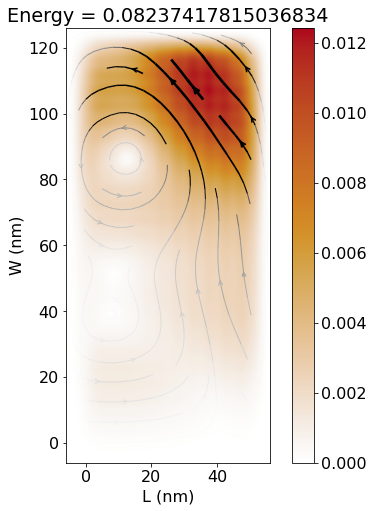

/tmp/ipykernel_29282/2722890961.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(syst, current, relwidth = 0.1, fig_size=(8,8), show=False);


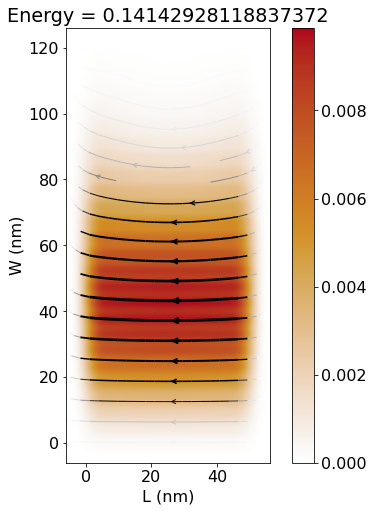

/tmp/ipykernel_29282/2722890961.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(syst, current, relwidth = 0.1, fig_size=(8,8), show=False);


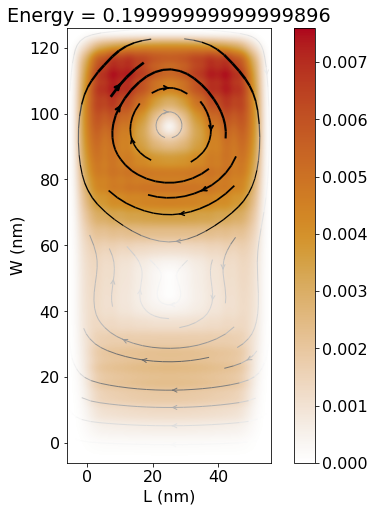

In [29]:
kwant_wf = kwant.wave_function(syst, energy=0, params=dict(mu=10*1e-3))
Andreev_bs_e = andreev_wf(eigvecs_e, kwant_wf)
Andreev_bs_h = andreev_wf(eigvecs_h, kwant_wf)
# current = intensity(syst=syst, psi=Andreev_bs)
density = densities(syst=syst, psi=Andreev_bs_e)

I_operator_density = kwant.operator.Density(syst)
I_operator_current = kwant.operator.Current(syst)

for ip, psi_i in enumerate(Andreev_bs_e):
#     density_e = I_operator_density(psi_i)
#     kwant.plotter.density(syst, density_e, relwidth = 0.1, fig_size=(8,8), show=False);
#     plt.title("e Energy = " + str(eigvals[ip]*1e3) + " " + str(ip))
#     plt.xlabel("L (nm)")
#     plt.ylabel("W (nm)")
#     plt.show()
    
    current = I_operator_current(psi_i)
    kwant.plotter.current(syst, current, relwidth = 0.1, fig_size=(8,8), show=False);
    plt.title("Energy = " + str(eigvals[ip]*1e3))
    plt.xlabel("L (nm)")
    plt.ylabel("W (nm)")
    plt.show()

/tmp/ipykernel_29282/1348877395.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(syst, current1, relwidth = 0.1, fig_size=(8,8), show=False,colorbar=False);


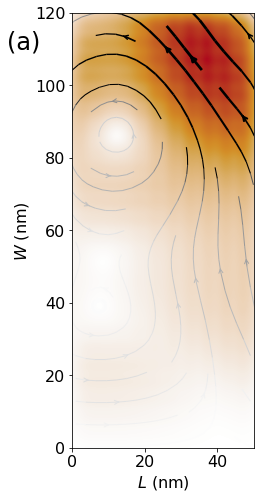

/tmp/ipykernel_29282/1348877395.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwant.plotter.current(syst, current2, relwidth = 0.1, fig_size=(8,8), show=False,colorbar=False);


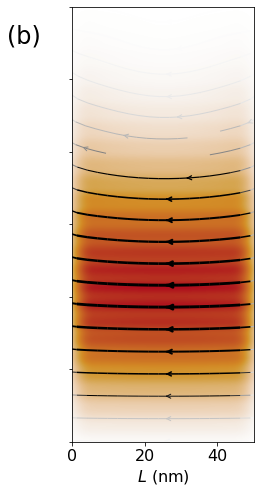

In [30]:
current1 = I_operator_current(Andreev_bs_e[0])
current2 = I_operator_current(Andreev_bs_e[1])


kwant.plotter.current(syst, current1, relwidth = 0.1, fig_size=(8,8), show=False,colorbar=False);
plt.xlabel("$L$ (nm)")
plt.ylabel("$W$ (nm)")
plt.xlim(0,50)
plt.xticks()
plt.ylim(0,120)
plt.text(-18, 110, "(a)", fontsize=24)
plt.savefig("teste_current1.pdf", bbox_inches='tight')

plt.show();

kwant.plotter.current(syst, current2, relwidth = 0.1, fig_size=(8,8), show=False,colorbar=False);
plt.xlabel("$L$ (nm)")
plt.xlim(0,50)
plt.ylim(0,120)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.text(-18, 110, "(b)", fontsize=24)
plt.savefig("teste_current2.pdf", bbox_inches='tight')
plt.show();






In [31]:
# syst = make_system(L_N =140, W=120)
# smatrix = kwant.smatrix(syst, energy=0, params=dict(mu=10*1e-3))
# eigvals,eigvecs, _h = ABS(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = 0.5*np.pi, phi3=0.75*np.pi)
# np.shape(eigvecs) 
# kwant_wf = kwant.wave_function(syst, energy=0, params=dict(mu=10*1e-3))
# Andreev_bs = andreev_wf(eigvecs, kwant_wf)
# current = intensity(syst=syst, psi=Andreev_bs)
# kwant.plotter.current(syst, current,relwidth = 0.08, fig_size=(8,12), colorbar = 0,show=False);
# plt.xlabel("L (nm)")
# plt.ylabel("W (nm)")
# plt.savefig("teste2.pdf")

In [32]:
from ipywidgets import interact, FloatSlider, Checkbox, IntSlider

def energies_current(L_N,W,phase3, mu):
    syst = make_system(L_N =L_N, W=W)
    smatrix = kwant.smatrix(syst, energy=0, params=dict(mu = mu))
    energies =[]
    ABStab= []
    phase2= np.linspace(0, 2 * np.pi, 100)
    Delta=0.2*1e-3
    for phi2 in phase2:
        #for phi3 in phase3:
        andreev_energies = ABS(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = phi2, phi3=phase3)[0]
        energies.append(andreev_energies)
        ABStab.append(np.sum(ABS(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = phi2, phi3=phase3)[0]))
    I= -1*np.gradient(ABStab, phase2)#current is -1* derivative d ABS/ d phi
    
#     print('   The Andreev bound energies      ')
#     print('-----------------------------------')
#     plt.plot(phase2/np.pi, np.array(energies)*1e3);
#     #plt.plot(phase2/pi, np.sum(np.array(energies)*1e3, axis = 1), "k-");
#     #print("SHAPE", np.shape(np.array(energies)))
#     #print(energies)
#     plt.xlabel("$\phi_{2}$")
#     #plt.ylim(0,0.4)
#     plt.grid()
#     plt.ylabel("energy [meV]")
#     plt.savefig('energies.png',bbox_inches='tight')
#     plt.show();

#     print('         The Supercurrent          ')
#     print('-----------------------------------')
    
#     Delta=0.2*1e-3
#     plt.plot(phase2/np.pi, np.array(I)/Delta);
#     plt.xlabel("$\phi_{2}$")
#     plt.grid()
#     plt.ylabel("current [e$\Delta$/hbar]")
#     plt.savefig('energies.png',bbox_inches='tight')
#     maximum =  (max(I)/Delta)
#     minimum =  (min(I)/Delta)
#     print('The maximum value of I is', maximum)
#     print('The minimum value of I is ', minimum)
#     print('Current difference:', abs(maximum - abs(minimum)))
    
#     n = (maximum - abs(minimum))/(maximum + abs(minimum))
#     print(np.shape(energies), n)
#     print("The efficiency is in percentage:", n*100)

        
    submat_01 = smatrix.submatrix(1,0)
    submat_10 = smatrix.submatrix(0,1)
    submat_12 = smatrix.submatrix(2,1)
    submat_02 = smatrix.submatrix(2,0)
    submat_20 = smatrix.submatrix(0,2)
    submat_21 = smatrix.submatrix(1,2)
    submat_00 = smatrix.submatrix(0,0)

        
    transmission01 = np.abs(submat_01)**2
    transmission10 = np.abs(submat_01)**2
    transmission02 =np.abs(submat_02)**2
    transmission20 =np.abs(submat_20)**2
    transmission12 = np.abs(submat_12)**2
    transmission21 = np.abs(submat_21)**2
    transmission00 = np.abs(submat_00)**2
    smatrix1 = smatrix.num_propagating(1)
    
    #print(smatrix1)
    
    
    print(" The transmission probability for T01 is: ", np.round(np.real(transmission01), decimals =3),\
          np.round(np.sum(np.real(transmission01), axis = 1), decimals =3))
    print("\n")
    
    print(" The transmission probability for T10 is: ", np.round(np.real(transmission10), decimals =3),\
          np.round(np.sum(np.real(transmission10), axis = 1), decimals =3))
    print("\n")
    
    print(" The transmission probability for T02 is: ", np.round(np.real(transmission02), decimals =3),\
          np.round(np.sum(np.real(transmission02), axis = 1), decimals =3))
    print("\n")
    
    print(" The transmission probability for T20 is: ", np.round(np.real(transmission20), decimals =3),\
           np.round(np.sum(np.real(transmission20), axis = 1), decimals =3))
    print("\n")
    
    print(" The transmission probability for T12 is: ", np.round(np.real(transmission12), decimals =3),\
          np.round(np.sum(np.real(transmission12), axis = 1), decimals =3))
    print("\n")
    
    print(" The transmission probability for T21 is: ", np.round(np.real(transmission21), decimals =3),\
          np.round(np.sum(np.real(transmission21), axis = 1), decimals =3))
    
    print(" The transmission probability for T00 is: ", np.round(np.real(transmission00), decimals =3),\
          np.round(np.sum(np.real(transmission00), axis = 1), decimals =3))
#     print(" This is the scattering matrix:", smatrix)

 
 #     print("smatrix1:", smatrix1)
#     print("smatrix:", smatrix.data)
interact(energies_current,  L_N=FloatSlider(min=50, max=300, step=5, description= 'Length of the normal region'),
        W=FloatSlider(min=10, max=300, step=5, description= 'width of the normal region'),
        phase3 =widgets.FloatSlider(min= 0, max=2 * pi, step=pi/18),
        mu = widgets.FloatSlider(min=0.01, max = 0.1, step = 0.01));    

interactive(children=(FloatSlider(value=50.0, description='Length of the normal region', max=300.0, min=50.0, …

In [33]:
from ipywidgets import interact, FloatSlider, Checkbox, IntSlider

def values_energies_current(L_N,W, phase3, mu):
    syst = make_system(L_N =L_N, W=W)
    smatrix = kwant.smatrix(syst, energy=0, params=dict(mu = mu))
    energies =[]
    ABStab= []
    phase2= np.linspace(0, 2 * pi, 100)
    for phi2 in phase2:
        #for phi3 in phase3:
        andreev_energies = ABS(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = phi2, phi3=phase3)[0]
        energies.append(andreev_energies)
        ABStab.append(np.sum(ABS(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = phi2, phi3=phase3)[0]))
    I= -1*np.gradient(ABStab, phase2)#current is -1* derivative d ABS/ d phi
    
    
    Delta=0.2*1e-3
    maximum =  (max(I)/Delta)
    minimum =  (min(I)/Delta)
    
    n = (maximum - abs(minimum))/(maximum + abs(minimum))
   
    return np.array(energies)*1e3, 2*I/Delta, n*100


In [34]:
#without RASHBA SPIN ORBIT COUPLING

In [35]:
teste = values_energies_current(L_N=112.5,W=300,phase3=3.8521511800601704, mu=10*1e-3)
teste[2]

-10.84199553313036

In [36]:
data1 = values_energies_current(L_N=50,W=120,phase3=1.5*np.pi, mu=10*1e-3)
data1[2]

-8.025500919060509

# OPTIMIZATION PROCEDURE

In [37]:
%%px --local

import scipy.optimize as sco 
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess, shgo
from scipy.optimize import minimize_scalar
from scipy.optimize import basinhopping,brute,dual_annealing
from scipy.optimize import Bounds
from scipy.optimize import rosen, differential_evolution

def efficiency(x):
    L_N, W, phi3 = x
    syst = make_system(L_N =x[0], W=x[1])
    smatrix = kwant.smatrix(syst, energy=0, params=dict(mu = 10*1e-3))
    ABStab= []
    phase2= np.linspace(0, 2 * pi, 100)
    Delta=0.2*1e-3
    for phi2 in phase2:
        ABStab.append(sum(ABS(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = phi2, phi3=x[2])[0]))
   
    I= -1*np.gradient(ABStab, phase2)#current is -1* derivative d ABS/ d phi
    

    maximum =  (max(I)/Delta)
    minimum =  (min(I)/Delta)

    
    n = (maximum - abs(minimum))/(maximum + abs(minimum))

    return -n*100

In [ ]:
%%time
#%%px --local
# Date : 16/11/2023
bounds = [(50,300), (50, 300), (0, 2*np.pi)]
#res = lview.map_async(efficiency, bounds)
#@current = res.get()
result = differential_evolution(efficiency, bounds, seed=None,strategy='best1bin')
result

In [38]:
# y0 = values_energies_current(L_N=102.64453342, W=125.89819989, phase3=2.42271149,mu=10*1e-3) # optimized values without Rashba
y0 = values_energies_current(L_N=100, W=125, phase3=2.42271149,mu=10*1e-3) # optimized values without Rashba

# FIGURE 9

/tmp/ipykernel_29282/2336518764.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 1, facecolor="lightcyan")
/tmp/ipykernel_29282/2336518764.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 1, facecolor="white")
/tmp/ipykernel_29282/2336518764.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 2, facecolor="white")


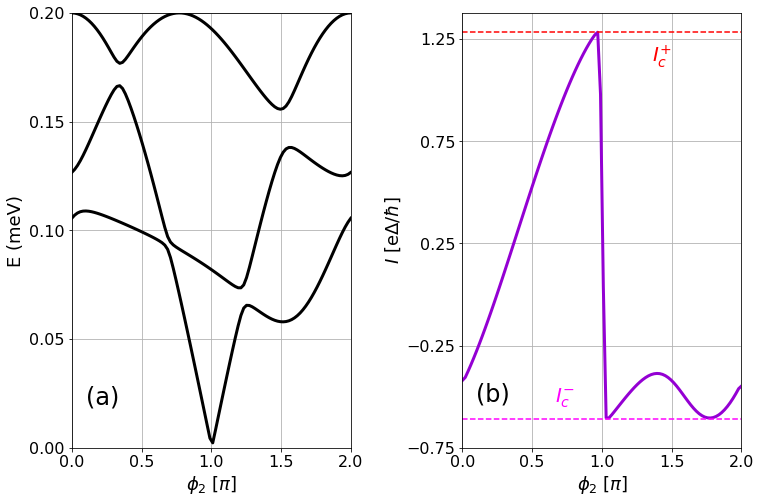

In [39]:
Delta = 0.2*1e-3
phase2 = np.linspace(0, 2*np.pi, 100)
rows, cols = 1, 2
f, axs = plt.subplots( rows, cols,figsize=(12, 8))
plt.subplot( rows, cols, 1, facecolor="lightcyan")
plt.subplots_adjust(wspace=0.4, hspace=0.1)
#f.tight_layout()

#plt.subplot(2, 2, 1)

plt.subplot( rows, cols, 1, facecolor="white")
frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])

plt.plot(phase2/np.pi,y0[0],lw=3, color = 'black')

plt.xlabel("$\phi_2\;[\pi]$",fontsize=18)
plt.ylabel("E (meV)",fontsize=18)
plt.xticks(np.arange(min(phase2/np.pi), max(phase2/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(np.arange(0.0, np.max(np.real(y0[0])) +0.01,0.05), fontsize = 16)

plt.ylim(0,0.2)
plt.xlim(0,2)
plt.text(0.1, 0.02, "(a)", fontsize=24)

plt.grid()

plt.subplot( rows, cols, 2, facecolor="white")

# plt.subplot(2, 2, 2)
frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])
plt.plot(phase2/np.pi,y0[1], color="darkviolet",lw=3)

plt.axhline(y=1.285, color='r', linestyle='--')#, label="$I^{+}_c$")
plt.axhline(y=-0.61, color='magenta', linestyle='--')#, label="$I^{-}_c$")
plt.text(1.5, 1.10, '$I^{+}_c$', color='r', fontsize=20, ha='right', va='bottom')
plt.text(0.8, -0.45, '$I^{-}_c$', color='magenta', fontsize=20, ha='right', va='top')

plt.xlabel("$\phi_2\;[\pi]$",fontsize=18)
plt.ylabel("$\mathit{I}$ [e$\Delta$/$\hbar$]", fontsize=18)
plt.xticks(np.arange(min(phase2/np.pi), max(phase2/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(np.arange(-0.75, np.max(np.real(y0[1]))+ 0.001,0.5), fontsize = 16)


plt.xlim(0,2)
plt.text(0.1, -0.52, "(b)", fontsize=24)
plt.annotate("$I^{+}_c$", fontsize=18, xy=(0.65, 1.5), xytext=(1.0, 1.3),
            arrowprops=dict(arrowstyle='->'))
plt.annotate('$I^{-}_c$',fontsize=18, xy=(1.05, -1.7), xytext=(0.6, -1.7),
            arrowprops=dict(arrowstyle='->'))


plt.grid()


plt.savefig("energies_current_optimized_values.pdf",bbox_inches ="tight")

plt.show()

# RESULTS WITH RASHBA SPIN ORBIT COUPLING

In [40]:
# We have created the same system but with a one function
def make_system_rashba(L_N,W, alpha):
    #CREATE SYSTEM
    #W=100
    a = 5*1e-9
    m = sc.m_e*0.014
    t = (sc.hbar**2/(2*m*a**2))/sc.eV
    
    lat = kwant.lattice.square(a*1e9, norbs=2)
    syst = kwant.Builder()
   
    
    def system(pos):                # This is the Normal part       
        (x,y) = pos
        ret = False
        if (0 <= x <= L_N and 0 <= y <= W):
            ret = True
        return ret
    
    
    B_field_temp = 0#1e-10
    
    def onsite(site, mu):
        (x, y) = site.pos
        return  (4 * t - mu) * tau_0 + B_field_temp*tau_z
    
    def hop_x(site1, site2):
        return -t *tau_0 + 1j * alpha * tau_y / (2*a*1e9)
    
    def hop_y(site1,site2):
        return -t * tau_0 -1j * alpha * tau_x / (2*a*1e9)
       
    syst[lat.shape(system, (0,0))] = onsite
    syst[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_x
    syst[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_y

    def lead_shape(pos):
        (x, y) = pos
        ret = False
        if 0 <= y <= W:
            ret=True
        return ret
    
    def lead_top_shape(pos):
        (x, y) = pos
        ret = False
        if 0 <= x <= L_N:
            ret=True
        return ret
   
    def left_onsite(site, mu):
        return (4 * t - mu) * tau_0 + B_field_temp*tau_z#+ par.Delta * tau_x
    
    def right_onsite(site, mu):

        return  (4 * t - mu) * tau_0 + B_field_temp*tau_z#+ phase * taux1  + np.conj(phase) * taux2
    
    def top_onsite(site, mu):
        return (4 * t - mu) * tau_0  + B_field_temp*tau_z
    
    
    def hop_lead_x(site1 ,site2):
        return -t * tau_0 + 1j * alpha * tau_y / (2*a*1e9) 
    
    def hop_lead_y(site1, site2):
        return -t * tau_0 - 1j * alpha * tau_x / (2*a*1e9)
   

    # Now we go to define the leads
    # Left lead - normal, so the order parameter is zero
    dx =a*1e9
   
    lead_left = kwant.Builder(kwant.TranslationalSymmetry((-dx, 0)), time_reversal= -1j*tau_y)#, conservation_law = -tau_z, particle_hole = tau_y)
    lead_left[lat.shape(lead_shape, (0, 0))]  = left_onsite
    #lead_left[lat.neighbors()] = hop_lead
    lead_left[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_lead_x
    lead_left[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_lead_y
    

    lead_right = kwant.Builder(kwant.TranslationalSymmetry((dx, 0)), time_reversal= -1j*tau_y)#, conservation_law = -tau_z, particle_hole = tau_y)
    lead_right[lat.shape(lead_shape, (0, 0))]  = right_onsite
    #lead_right[lat.neighbors()] = hop_lead
    lead_right[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_lead_x
    lead_right[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_lead_y
    
    
    lead_top = kwant.Builder(kwant.TranslationalSymmetry((0, dx)), time_reversal= -1j*tau_y)#, conservation_law = -tau_z, particle_hole = tau_y)
    lead_top[lat.shape(lead_top_shape, (0, 0))]  = top_onsite
    #lead_top[lat.neighbors()] = hop_lead
    lead_top[kwant.builder.HoppingKind((1, 0), lat, lat)] = hop_lead_x
    lead_top[kwant.builder.HoppingKind((0, 1), lat, lat)] = hop_lead_y
     
    syst.attach_lead(lead_left)
    syst.attach_lead(lead_right)
    syst.attach_lead(lead_top)
 
    syst = syst.finalized()

        
    return syst

In [41]:
def ABS_rashba(smatrix, Delta, phi1, phi2, phi3):
    s = smatrix
    N, M, L = [len(li.momenta) // 2 for li in s.lead_info]
    s = s.data
    r_a11 = 1j * np.exp(-1j * phi1) * np.eye(N)
    r_a12 = np.zeros((N, M))
    r_a13 = np.zeros((N, L))

    r_a21 = r_a12.T
    r_a22 = 1j * np.exp(-1j * phi2) * np.eye(M)
    r_a23 = np.zeros((M,L))
    
    r_a31 = r_a13.T
    r_a32 = r_a23.T
    r_a33 = 1j * np.exp(-1j * phi3) * np.eye(L) 
    
    r_a = np.bmat([[r_a11, r_a12, r_a13], [r_a21, r_a22, r_a23],[r_a31, r_a32, r_a33]])
    zeros = np.zeros(shape=(len(s), len(s)))
    matrix = np.bmat([[zeros, (s.T.conj()).dot(r_a.conj())],
                      [(s.T).dot(r_a), zeros]])
    
    scattering_matrix = np.bmat([[s, zeros], [zeros, s.T.conj()]])

    eigVl, eigVc  = la.eig(matrix)

    eigVlinds = eigVl.argsort()
    eigVl = eigVl[eigVlinds]
    eigVc = eigVc[:,eigVlinds]
    
   
    values = eigVl[eigVl.imag > 0].imag
    if (len(values)/2%2 == 0):
        start = len(values)/2
    else:
        start = len(values)/2 - 1
    values = [values[int(start):]]
    
    return np.array(values)*Delta

In [42]:
from ipywidgets import interact, FloatSlider, Checkbox, IntSlider

def energies_current_rashba(L_N,W,alpha, phase3, mu):
    syst = make_system_rashba(L_N =L_N, W=W, alpha=alpha)
    smatrix = kwant.smatrix(syst, energy=0, params=dict(mu = mu))
    energies =[]
    ABStab= []
    Delta=0.2*1e-3
    phase2= np.linspace(0, 2 * pi, 100)
    for phi2 in phase2:
        #for phi3 in phase3:
        andreev_energies = ABS_rashba(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = phi2, phi3=phase3)[0]
        energies.append(andreev_energies)
        ABStab.append(sum(ABS_rashba(smatrix=smatrix, Delta=0.2*1e-3, phi1 = 0, phi2 = phi2, phi3=phase3)[0]))
    I= -1*np.gradient(ABStab, phase2)#current is -1* derivative d ABS/ d phi
    

    maximum =  (max(I)/Delta)
    minimum =  (min(I)/Delta)

    
    n = (maximum - abs(minimum))/(maximum + abs(minimum))

    return np.array(energies)*1e3, np.array(I)/Delta, np.around(n*100, decimals=4)

In [43]:
data2 = energies_current_rashba(L_N=50,W=120,alpha=0.05, phase3=1.5*np.pi, mu=10*1e-3)
data2[2]

-7.6709

# Figure 6

/tmp/ipykernel_29282/785348012.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 1, facecolor="lightcyan")
/tmp/ipykernel_29282/785348012.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 1, facecolor="white")
/tmp/ipykernel_29282/785348012.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( rows, cols, 2, facecolor="white")
/tmp/ipykernel_29282/785348012.py:54: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subp

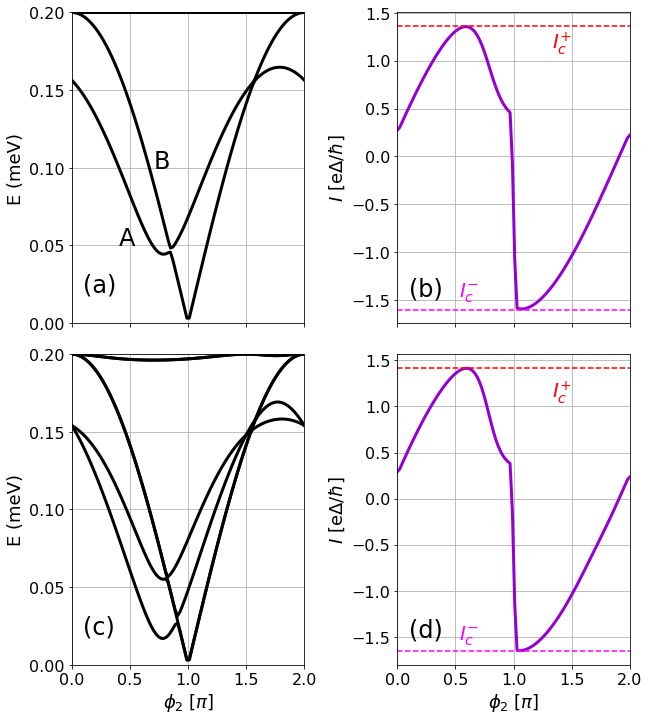

In [44]:
#New figures together, \phi_{3} = 0 and \phi_{3} = 0

Delta = 0.2*1e-3
phase2 = np.linspace(0, 2*np.pi, 100)
rows, cols = 2, 2
f, axs = plt.subplots( rows, cols,figsize=(10, 12))
plt.subplot( rows, cols, 1, facecolor="lightcyan")
plt.subplots_adjust(wspace=0.4, hspace=0.1)
#f.tight_layout()

#plt.subplot(2, 2, 1)

plt.subplot( rows, cols, 1, facecolor="white")
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.plot(phase2/np.pi,data1[0],lw=3,color = 'black')#, label ='$\phi_3 = 0$')
plt.ylabel("E (meV)",fontsize=18)
plt.xticks(np.arange(min(phase2/np.pi), max(phase2/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(np.arange(0.0, np.max(np.real(data1[0])),0.05), fontsize = 16)

plt.ylim(0,0.2)
plt.xlim(0,2)
plt.text(0.1, 0.02, "(a)", fontsize=24)
plt.text(0.4, 0.05, "A", fontsize=24)
plt.text(0.7, 0.10, "B", fontsize=24)



plt.grid()

plt.subplot( rows, cols, 2, facecolor="white")

# plt.subplot(2, 2, 2)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.plot(phase2/np.pi,data1[1], color="darkviolet",lw=3)
plt.axhline(y=1.36, color='r', linestyle='--')#, label="$I^{+}_c$")
plt.axhline(y=-1.60, color='magenta', linestyle='--')#, label="$I^{-}_c$")
plt.text(1.5, 1.05, '$I^{+}_c$', color='r', fontsize=20, ha='right', va='bottom')
plt.text(0.7, -1.30, '$I^{-}_c$', color='magenta', fontsize=20, ha='right', va='top')

plt.ylabel("$\mathit{I}$ [e$\Delta$/$\hbar$]", fontsize=18)
plt.xticks(np.arange(min(phase2/np.pi), max(phase2/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(fontsize=16)

plt.xlim(0,2)
plt.text(0.1, -1.45, "(b)", fontsize=24)


plt.grid()

# plt.subplot(2, 2, 3)
plt.subplot( rows, cols, 3, facecolor="white")

frame1 = plt.gca()

plt.plot(phase2/np.pi,data2[0], lw=3, color='black')

plt.xlabel("$\phi_2\;[\pi]$",fontsize=18)
plt.ylabel("E (meV)",fontsize=18)
plt.xticks(np.arange(min(phase2/np.pi), max(phase2/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(np.arange(0.0, np.max(np.real(data2[1]))+ 0.001,0.05), fontsize = 16)


plt.ylim(0,0.2)
plt.xlim(0,2)
plt.text(0.1, 0.02, "(c)", fontsize=24)
plt.grid()


# plt.subplot(2, 2, 4)
plt.subplot( rows, cols, 4, facecolor="white")

frame1 = plt.gca()

plt.plot(phase2/np.pi,data2[1],color="darkviolet",lw=3)

plt.xlabel("$\phi_2\;[\pi]$",fontsize=18)
plt.ylabel("$\mathit{I}$ [e$\Delta$/$\hbar$]", fontsize=18)
plt.xticks(np.arange(min(phase2/np.pi), max(phase2/np.pi)+0.5, 0.5), fontsize = 16)
plt.yticks(fontsize=16)

plt.xlim(0,2)
# plt.ylim(-1.5,1.5)

plt.text(0.1, -1.5, "(d)", fontsize=24)
plt.axhline(y=1.42, color='r', linestyle='--')#, label="$I^{+}_c$")
plt.axhline(y=-1.65, color='magenta', linestyle='--')#, label="$I^{-}_c$")
plt.text(1.5, 1.01, '$I^{+}_c$', color='r', fontsize=20, ha='right', va='bottom')
plt.text(0.7, -1.36, '$I^{-}_c$', color='magenta', fontsize=20, ha='right', va='top')


plt.grid()
plt.savefig("energies_current_phi3_numerical_witht_without_rashba.pdf",bbox_inches ="tight")

plt.show()